# A Cool Visualization of Board with Pyplot Table

In [1]:
import sys
sys.path.append('../src')

In [2]:
import pickle
import numpy

In [3]:
import encoder_decoder_uttt as ed

In [4]:
import matplotlib.pyplot as plt
from matplotlib.table import Table
import pandas as pd
import numpy as np



def view_board(np_data, fmt='{:s}', bkg_colors=['pink', 'pink']):
    data = pd.DataFrame(np_data, columns=['0','1','2','3','4','5','6','7','8'])
    fig, ax = plt.subplots(figsize=[9,9])
    ax.set_axis_off()
    tb = Table(ax, bbox=[0,0,1,1])
    nrows, ncols = data.shape
    width, height = 1.0 / ncols, 1.0 / nrows

    for (i,j), val in np.ndenumerate(data):
        idx = [j % 2, (j + 1) % 2][i % 2]
        color = bkg_colors[idx]

        tb.add_cell(i, j, width, height, text=fmt.format(val), 
                    loc='center', facecolor=color)

    for i, label in enumerate(data.index):
        tb.add_cell(i, -1, width, height, text=label, loc='right',
                    edgecolor='none', facecolor='none')

    for j, label in enumerate(data.columns):
        tb.add_cell(-1, j, width, height/2, text=label, loc='center', 
                           edgecolor='none', facecolor='none')
    tb.set_fontsize(24)
    ax.add_table(tb)
    return fig

In [5]:
# file = "../src/datasets/dataset_iter0_cpu1_0_2021-05-07"
file = "../src/datasets/dataset_iter0_cpu0_1_2021-05-10"
with open(file, 'rb') as f:
    data = pickle.load(f)

In [9]:
for i in range(len(data)):
    s,p,value = data[i]
    cboard = ed.decode_board(s)
    m,n = cboard.old_move
    if m != -1:
        cboard.current_board[m,n] += '-'
    fig = view_board(cboard.current_board)
    fig.savefig(f"./pics/0509game_cpu0_iter0_num_{i:02}.png")
    plt.close()
#     break

We can use ffmpeg to create GIF for the game

```
ffmpeg -r 1 -i game_iter0_num_%02d.png -vcodec mpeg4 -b 2G test_junk.mp4
ffmpeg -i test_junk.mp4 -pix_fmt rgb24 out.gif
```

In [18]:
s,p,value = data[-2]

In [19]:
value_mat = np.zeros((9,9))
for i in range(p.shape[0]):
    m = i // 9
    n = i % 9
    value_mat[m,n] = p[i]

In [20]:
value_mat

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.92902088, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.01425032, 0.05672883, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],


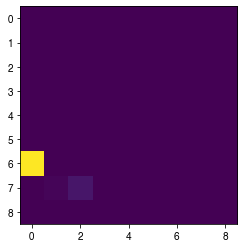

In [21]:
plt.imshow(value_mat)

In [6]:
i = 40
s,p,value = data[i]
cboard = ed.decode_board(s)
m,n = cboard.old_move
if m != -1:
    cboard.current_board[m,n] += '-'
cboard.current_board

array([[' ', 'X', 'O', 'X', ' ', 'O', 'O', 'X', 'X'],
       ['X', ' ', 'X', ' ', ' ', 'O', 'O', ' ', 'X'],
       [' ', 'O', 'X', ' ', 'O', ' ', 'X', 'O', 'X'],
       [' ', 'X', 'O', 'O', ' ', 'X', 'X', ' ', 'O'],
       ['O', ' ', 'X-', ' ', ' ', ' ', ' ', ' ', ' '],
       [' ', 'O', ' ', ' ', ' ', ' ', 'O', ' ', ' '],
       ['O', ' ', ' ', ' ', ' ', 'X', 'O', 'O', 'O'],
       ['X', ' ', ' ', 'X', 'O', ' ', ' ', 'X', ' '],
       [' ', ' ', ' ', ' ', 'X', 'X', ' ', ' ', 'O']], dtype='<U32')

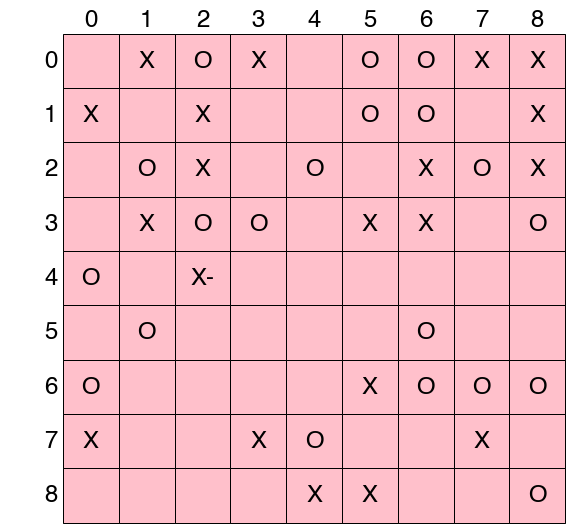

In [8]:
fig = view_board(cboard.current_board)
fig.savefig("./pics/report-board-eg.png")